## Project 3

## <em> Classification and inference with machine learning</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>
<span style="color:green"><i> Enter here </i></span> <br>

<span style="color:red"><i> IMPORTANT!  </i></span> <br>
<span style="color:red"><i> 1. You can work in pairs and exchange ideas, BUT you must run codes in your datahub environment and submit your own work. We will only grade the work you submitted via okpy.  </i></span> <br>
<span style="color:red"><i> 2. Project 3 is STRICTLY due 11:59pm, 12/17. </i></span> <br>
<span style="color:red"><i> 3. During RRR week, we have 4 office hours: </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/9 (M), 3:30-4:30pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/9 (M), 4:30-5:30pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/11 (W), 1:00-2:00pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/11(W), 2:00-3:00pm, 251 LeConte </i></span> <br>


***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('Project3_288.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***

#### Problem 1 - Using Keras - MNIST

The goal of this notebook is to introduce deep neural networks (DNNs) and convolutional neural networks (CNNs) using the high-level Keras package and to become familiar with how to choose its architecture, cost function, and optimizer in Keras. We will also learn how to train neural networks.

We will once again work with the MNIST dataset of hand written digits introduced in HW8. The goal is to find a statistical model which recognizes and distinguishes between the ten handwritten digits (0-9).

The MNIST dataset comprises handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task. 

In this Notebook, we show how to use the Keras python package to tackle the MNIST problem with the help of deep neural networks.

## Creating DNNs with Keras

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model 
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

We would like to emphasize that, while it is always possible to view steps 1-5 as independent of the particular task we are trying to solve, it is only when they are put together in ***step 6*** that the real gain of using Deep Learning is revealed, compared to less sophisticated methods such as the regression models. With this remark in mind, we shall focus predominantly on steps 1-5 below. We show how one can use grid search methods to find optimal hyperparameters in ***step 6***.

### Step 1: Load and Process the Data

Keras knows to download automatically the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape ($({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$). 

The size of each sample, i.e. the number of bare features used is N_features (whis is 784 because we have a $28 \times 28$ pixel grid), while the number of potential classification categories is "num_classes" (which is 10, number of digits).

Each pixel
contains a greyscale value quantified by an integer between
0 and 255. To standardize the dataset, we normalize
the input data in the interval [0, 1]. 

In [2]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


Using TensorFlow backend.


<span style="color:blue"> <i> 1. Make a plot of one MNIST digit (2D plot using X data - make sure to reshape it into a $28 \times 28$ matrix) and label it (which digit does it correspond to?). </i></span> <br>

Below is the plot of one MNIST digit with label 5


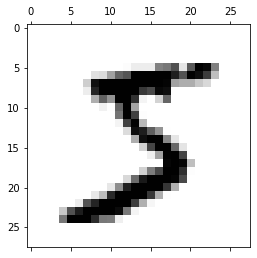

In [3]:
print("Below is the plot of one MNIST digit with label " + str(Y_train[0]))
plt.matshow(X_train[0].reshape(28, 28), cmap='binary')

Last, we cast the label vectors $y$ to binary class matrices (a.k.a. one-hot format).

In [4]:
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : ", Y_train[0:10])

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : ", Y_train[0:10])

before conversion - 
y vector :  [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Here in this template, we use 40000 training samples and 10000 test samples. Remember that we preprocessed data into the shape $({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$.

In [5]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one.

Let us create an instance of Keras' `Sequential()` class, called `model`. As the name suggests, this class allows us to build DNNs layer by layer. (https://keras.io/getting-started/sequential-model-guide/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# instantiate model
model = Sequential()

We use the `add()` method to attach layers to our model. For the purposes of our introductory example, it suffices to focus on `Dense` layers for simplicity. (https://keras.io/layers/core/) Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

First, add a `Dense` layer with 400 output neurons and `relu` activation function.

In [7]:
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

Add another layer with 100 output neurons. Then, we will apply "dropout," a regularization scheme that has been widely adopted in the neural networks literature: during the training procedure neurons
are randomly “dropped out” of the neural network with some
probability $p$ giving rise to a thinned network. It prevents overfitting by reducing spurious correlations between neurons within the network by introducing
a randomization procedure.

In [8]:
model.add(Dense(100, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))

Lastly, we need to add a soft-max layer since we have a multi-class output.

In [9]:
model.add(Dense(num_classes, activation='softmax'))

### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module (https://keras.io/optimizers/), but we could use `Adam()` or any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function. 

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points. 

To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [10]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])


### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. 

(The number of epochs is the number of complete passes through the training dataset, and the batch size is a number of samples propagated through the network before the model is updated.)

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or validation data. To monitor the training procedure for every epoch, we set `verbose=True`. 

Let us set `batch_size` = 64 and `epochs` = 10.

In [11]:
# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 70us/step - loss: 1.2014 - accuracy: 0.6446 - val_loss: 0.5088 - val_accuracy: 0.8840
Epoch 2/10
40000/40000 [==============================] - 3s 66us/step - loss: 0.5895 - accuracy: 0.8317 - val_loss: 0.3646 - val_accuracy: 0.9064
Epoch 3/10
40000/40000 [==============================] - 3s 72us/step - loss: 0.4755 - accuracy: 0.8649 - val_loss: 0.3082 - val_accuracy: 0.9191
Epoch 4/10
40000/40000 [==============================] - 3s 76us/step - loss: 0.4102 - accuracy: 0.8815 - val_loss: 0.2756 - val_accuracy: 0.9240
Epoch 5/10
40000/40000 [==============================] - 3s 75us/step - loss: 0.3717 - accuracy: 0.8976 - val_loss: 0.2526 - val_accuracy: 0.9288
Epoch 6/10
40000/40000 [==============================] - 3s 78us/step - loss: 0.3446 - accuracy: 0.9029 - val_loss: 0.2338 - val_accuracy: 0.9340
Epoch 7/10
40000/40000 [==============================] - 3s 81us/s

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

10000/10000 [==============================] - 0s 31us/step
Test loss: 0.18735940931737424
Test accuracy: 0.9458000063896179


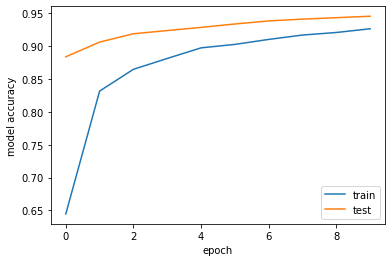

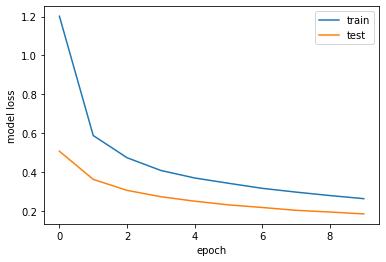

In [12]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

Last, we show how to use the grid search option of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize the 
hyperparameters of our model.

First, define a function for crating a DNN:

In [7]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_DNN(optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

With epochs = 1 and batch_size = 64, do grid search over the following optimization schemes: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'].

In [14]:
batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 0s 26us/step
Epoch 1/1
10000/10000 [==============================] - 0s 30us/step
Epoch 1/1
10000/10000 [==============================] - 0s 31us/step
Epoch 1/1
10000/10000 [==============================] - 0s 33us/step
Epoch 1/1
10000/10000 [==============================] - 0s 34us/step
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
Epoch 1/1
10000/10000 [==============================] - 0s 39us/step
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step
Epoch 1/1
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
10000/10000 [==============================] - 0s 44us/step
Epoch 1/1
10000/10000 [==============================] - 0s 43us/step
Epoch 1/1
10000/10000 [==============================] - 1s 56us/step
Epoch 1/1
10000/10000 [==============================] - 1s 55us/step
Epoch 1/1
10000/1000

Show the mean test score of all optimization schemes and determine which scheme gives the best accuracy.

In [15]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.950450 using {'optimizer': 'Nadam'}
0.850600 (0.013866) with: {'optimizer': 'SGD'}
0.947625 (0.001431) with: {'optimizer': 'RMSprop'}
0.946850 (0.003115) with: {'optimizer': 'Adagrad'}
0.942725 (0.002599) with: {'optimizer': 'Adadelta'}
0.946350 (0.001135) with: {'optimizer': 'Adam'}
0.935400 (0.002521) with: {'optimizer': 'Adamax'}
0.950450 (0.003120) with: {'optimizer': 'Nadam'}


<span style="color:blue"> <i> 2. Create a DNN with one Dense layer having 200 output neurons. Do the grid search over any 5 different activation functions from https://keras.io/activations/. Let epochs = 1, batches = 64, p_dropout=0.5, and optimizer=keras.optimizers.Adam().  Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [9]:
def create_DNN(activation):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation=activation))
    model.add(Dense(200, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activation = ['relu', 'sigmoid', 'selu', 'tanh', 'elu']
# define parameter dictionary
param_grid = dict(activation=activation)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)


Epoch 1/1
10000/10000 [==============================] - 0s 28us/step
Epoch 1/1
10000/10000 [==============================] - 0s 33us/step
Epoch 1/1
10000/10000 [==============================] - 0s 35us/step
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
Epoch 1/1
10000/10000 [==============================] - 0s 41us/step
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step
Epoch 1/1
10000/10000 [==============================] - 0s 47us/step
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
10000/10000 [==============================] - 1s 51us/step
Epoch 1/1
10000/10000 [==============================] - 1s 55us/step
Epoch 1/1
10000/10000 [==============================] - 1s 56us/step
Epoch 1/1
10000/10000 [==============================] - 1s 59us/step
Epoch 1/1
10000/10000 [==============================] - 1s 55us/

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.949650 using {'activation': 'relu'}
0.949650 (0.001604) with: {'activation': 'relu'}
0.907400 (0.004003) with: {'activation': 'sigmoid'}
0.908950 (0.006802) with: {'activation': 'selu'}
0.923100 (0.006149) with: {'activation': 'tanh'}
0.926900 (0.002697) with: {'activation': 'elu'}


<span style="color:blue"> <i> 3. Now, do the grid search over different combination of batch sizes (10, 30, 50, 100) and number of epochs (1, 2, 5). Use the activation function that gave you the highest accuracy in Part 2. Make sure to print the mean test score of each case and determine which combination of batch size and number of epochs gives the best accuracy. Here, you have a freedom to create your own DNN (assume an arbitrary number of Dense layers, optimization scheme, etc).   </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

Hint: To do the grid search over both batch_size and epochs, you can do:

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [8]:
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Nadam',
              metrics=['accuracy'])
    return model

batch_sizes = [10, 30, 50, 100]
epochs = [1, 2, 5]
param_grid = dict(batch_size=batch_sizes, epochs=epochs)

model_gridsearch = KerasClassifier(build_fn=create_DNN, verbose=1)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)


Epoch 1/1
10000/10000 [==============================] - 1s 86us/step
Epoch 1/1
10000/10000 [==============================] - 1s 119us/step
Epoch 1/1
10000/10000 [==============================] - 1s 128us/step
Epoch 1/1
10000/10000 [==============================] - 1s 98us/step
Epoch 1/2
30000/30000 [==============================] - 24s 812us/step - loss: 0.3204 - accuracy: 0.9048
Epoch 2/2
10000/10000 [==============================] - 1s 123us/step
Epoch 1/2
30000/30000 [==============================] - 28s 944us/step - loss: 0.3166 - accuracy: 0.9081
Epoch 2/2
10000/10000 [==============================] - 2s 201us/step
Epoch 1/2
30000/30000 [==============================] - 30s 997us/step - loss: 0.3096 - accuracy: 0.9102
Epoch 2/2
10000/10000 [==============================] - 1s 140us/step
Epoch 1/2
30000/30000 [==============================] - 28s 936us/step - loss: 0.3136 - accuracy: 0.9083
Epoch 2/2
10000/10000 [==============================] - 1s 115us/step
Epoch 1/5

30000/30000 [==============================] - 6s 194us/step - loss: 0.1339 - accuracy: 0.9596
Epoch 3/5
30000/30000 [==============================] - 6s 204us/step - loss: 0.0861 - accuracy: 0.9734
Epoch 4/5
30000/30000 [==============================] - 6s 192us/step - loss: 0.0664 - accuracy: 0.9791
Epoch 5/5
10000/10000 [==============================] - 1s 118us/step
Epoch 1/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.2910 - accuracy: 0.9107
Epoch 2/5
40000/40000 [==============================] - 8s 191us/step - loss: 0.1201 - accuracy: 0.9645
Epoch 3/5
40000/40000 [==============================] - 8s 203us/step - loss: 0.0865 - accuracy: 0.9735
Epoch 4/5
40000/40000 [==============================] - 8s 204us/step - loss: 0.0642 - accuracy: 0.9798
Epoch 5/5
40000/40000 [==============================] - 9s 215us/step - loss: 0.0493 - accuracy: 0.9844


In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971400 using {'batch_size': 100, 'epochs': 5}
0.949300 (0.003920) with: {'batch_size': 10, 'epochs': 1}
0.955000 (0.003219) with: {'batch_size': 10, 'epochs': 2}
0.963575 (0.001462) with: {'batch_size': 10, 'epochs': 5}
0.944675 (0.008179) with: {'batch_size': 30, 'epochs': 1}
0.962175 (0.004049) with: {'batch_size': 30, 'epochs': 2}
0.968650 (0.002714) with: {'batch_size': 30, 'epochs': 5}
0.956375 (0.003616) with: {'batch_size': 50, 'epochs': 1}
0.963125 (0.002216) with: {'batch_size': 50, 'epochs': 2}
0.969675 (0.002091) with: {'batch_size': 50, 'epochs': 5}
0.948975 (0.003609) with: {'batch_size': 100, 'epochs': 1}
0.962250 (0.003228) with: {'batch_size': 100, 'epochs': 2}
0.971400 (0.001304) with: {'batch_size': 100, 'epochs': 5}


<span style="color:blue"> <i> 4. Do the grid search over the number of neurons in the Dense layer and make a plot of mean test score as a function of num_neurons. Again, you have a freedom to create your own DNN. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [8]:
def create_DNN(num_neurons1, num_neurons2):
    model = Sequential()
    model.add(Dense(num_neurons1,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(num_neurons2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Nadam',
              metrics=['accuracy'])
    return model

batch_size = 100
epochs = 5
neurons1 = [100, 200, 400, 800]
neurons2 = [100, 200, 400, 800]
param_grid = dict(num_neurons1=neurons1, num_neurons2=neurons2)

model_gridsearch = KerasClassifier(build_fn=create_DNN, batch_size=batch_size, epochs=epochs, verbose=1)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)


Epoch 1/5
30000/30000 [==============================] - 1s 33us/step - loss: 0.4884 - accuracy: 0.8524
Epoch 2/5
30000/30000 [==============================] - 1s 30us/step - loss: 0.2073 - accuracy: 0.9394
Epoch 3/5
30000/30000 [==============================] - 1s 27us/step - loss: 0.1492 - accuracy: 0.9570
Epoch 4/5
30000/30000 [==============================] - 1s 29us/step - loss: 0.1157 - accuracy: 0.9653
Epoch 5/5
10000/10000 [==============================] - 0s 15us/step
Epoch 1/5
30000/30000 [==============================] - 1s 36us/step - loss: 0.4797 - accuracy: 0.8551
Epoch 2/5
30000/30000 [==============================] - 1s 32us/step - loss: 0.2061 - accuracy: 0.9407
Epoch 3/5
30000/30000 [==============================] - 1s 34us/step - loss: 0.1471 - accuracy: 0.9564
Epoch 4/5
30000/30000 [==============================] - 1s 32us/step - loss: 0.1135 - accuracy: 0.9663
Epoch 5/5
10000/10000 [==============================] - 0s 14us/step
Epoch 1/5
30000/30000 [====

10000/10000 [==============================] - 1s 81us/step
Epoch 1/5
30000/30000 [==============================] - 6s 204us/step - loss: 0.3103 - accuracy: 0.9057
Epoch 2/5
30000/30000 [==============================] - 5s 183us/step - loss: 0.1162 - accuracy: 0.9643
Epoch 3/5
30000/30000 [==============================] - 5s 165us/step - loss: 0.0809 - accuracy: 0.9741
Epoch 4/5
30000/30000 [==============================] - 5s 173us/step - loss: 0.0601 - accuracy: 0.98080s - loss: 0.058
Epoch 5/5
10000/10000 [==============================] - 1s 66us/step
Epoch 1/5
30000/30000 [==============================] - 5s 161us/step - loss: 0.3117 - accuracy: 0.9051
Epoch 2/5
30000/30000 [==============================] - 5s 153us/step - loss: 0.1172 - accuracy: 0.9639
Epoch 3/5
30000/30000 [==============================] - 5s 156us/step - loss: 0.0815 - accuracy: 0.9741
Epoch 4/5
30000/30000 [==============================] - 5s 165us/step - loss: 0.0601 - accuracy: 0.98101s - los
Epoch 

10000/10000 [==============================] - 2s 153us/step
Epoch 1/5
30000/30000 [==============================] - 9s 302us/step - loss: 0.3112 - accuracy: 0.9058
Epoch 2/5
30000/30000 [==============================] - 8s 281us/step - loss: 0.1233 - accuracy: 0.9630
Epoch 3/5
30000/30000 [==============================] - 9s 288us/step - loss: 0.0807 - accuracy: 0.9757
Epoch 4/5
30000/30000 [==============================] - 8s 278us/step - loss: 0.0616 - accuracy: 0.9805
Epoch 5/5
10000/10000 [==============================] - 2s 195us/step
Epoch 1/5
30000/30000 [==============================] - 13s 438us/step - loss: 0.2965 - accuracy: 0.9091
Epoch 2/5
30000/30000 [==============================] - 13s 443us/step - loss: 0.1109 - accuracy: 0.9654
Epoch 3/5
30000/30000 [==============================] - 11s 352us/step - loss: 0.0727 - accuracy: 0.9770
Epoch 4/5
30000/30000 [==============================] - 10s 343us/step - loss: 0.0585 - accuracy: 0.9806
Epoch 5/5
10000/10000 [=

Best: 0.972100 using {'num_neurons1': 400, 'num_neurons2': 400}
0.964775 (0.002378) with: {'num_neurons1': 100, 'num_neurons2': 100}
0.967900 (0.001404) with: {'num_neurons1': 100, 'num_neurons2': 200}
0.967100 (0.002219) with: {'num_neurons1': 100, 'num_neurons2': 400}
0.967425 (0.003084) with: {'num_neurons1': 100, 'num_neurons2': 800}
0.971025 (0.001487) with: {'num_neurons1': 200, 'num_neurons2': 100}
0.971525 (0.001395) with: {'num_neurons1': 200, 'num_neurons2': 200}
0.969425 (0.001820) with: {'num_neurons1': 200, 'num_neurons2': 400}
0.969750 (0.003188) with: {'num_neurons1': 200, 'num_neurons2': 800}
0.971125 (0.001491) with: {'num_neurons1': 400, 'num_neurons2': 100}
0.971275 (0.002338) with: {'num_neurons1': 400, 'num_neurons2': 200}
0.972100 (0.001739) with: {'num_neurons1': 400, 'num_neurons2': 400}
0.969750 (0.002952) with: {'num_neurons1': 400, 'num_neurons2': 800}
0.971200 (0.001251) with: {'num_neurons1': 800, 'num_neurons2': 100}
0.968850 (0.002953) with: {'num_neurons

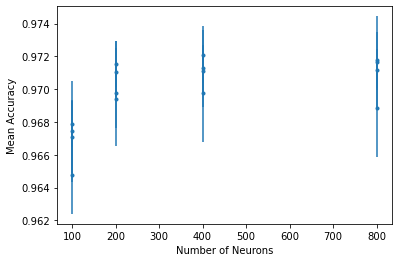

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
values = [list(params[i].values())[0] for i in range(len(params))]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.errorbar(values, means, yerr=stds, fmt='.')
plt.xlabel("Number of Neurons")
plt.ylabel("Mean Accuracy")
plt.show()

In [17]:
best_neurons1 = grid_result.best_params_['num_neurons1']
best_neurons2 = grid_result.best_params_['num_neurons2']

model_final = create_DNN(best_neurons1, best_neurons2)
history=model_final.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

score = model_final.evaluate(X_test, Y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 11s 264us/step - loss: 0.2710 - accuracy: 0.9171 - val_loss: 0.1185 - val_accuracy: 0.9633
Epoch 2/5
40000/40000 [==============================] - 10s 242us/step - loss: 0.1068 - accuracy: 0.9676 - val_loss: 0.0871 - val_accuracy: 0.9755
Epoch 3/5
40000/40000 [==============================] - 10s 254us/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 4/5
40000/40000 [==============================] - 10s 260us/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.0883 - val_accuracy: 0.9767
Epoch 5/5
10000/10000 [==============================] - 2s 165us/step
Test loss: 0.08455990283342545
Test accuracy: 0.9761000275611877


## Creating CNNs with Keras

<span style="color:red"> <i> Please restart the kernel ("Kernel"-"Restart") and re-load the data. </i></span> <br>

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. This approach neglects any spatial structure in the image. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [8]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers. Luckily, all we need to do is change the architecture of our DNN.

![alt text](CNN.png "Title")

After we instantiate the model, add the first convolutional layer with 10 filters, which is the dimensionality of output space. (https://keras.io/layers/convolutional/) Here, we will be concerned with local spatial filters
that take as inputs a small spatial patch of the
previous layer at all depths. We consider a three-dimensional kernel of size $5\times5\times1$. Check out this visualization of the
convolution procedure for a square input of unit depth: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
The convolution consists of running this filter over all locations
in the spatial plane. After computing the filter, the output is passed through
a non-linearity, a ReLU.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

Subsequently, add a 2D pooling layer. (https://keras.io/layers/pooling/) This pooling layer coarse-grain spatial information by performing
a subsampling at each depth. Here, we use the the max pool operation. In a max pool, the spatial
dimensions are coarse-grained by replacing a small region
(say $2\times2$ neurons) by a single neuron whose output is the
maximum value of the output in the region.

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Add another convolutional layers with 20 filters and apply dropout. Then, add another pooling layer and flatten the data. You can do DNNs afterwards and compile the model.

In [12]:
# add second convolutional layer with 20 filters
model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
model.add(Flatten())
# add a dense all-to-all relu layer
model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


Lastly, train your CNN and evaluate the model.

In [13]:
# training parameters
batch_size = 64
epochs = 10

# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 373us/step - loss: 0.3191 - accuracy: 0.8997 - val_loss: 0.1013 - val_accuracy: 0.9787
Epoch 2/10
40000/40000 [==============================] - 14s 354us/step - loss: 0.1049 - accuracy: 0.9668 - val_loss: 0.0638 - val_accuracy: 0.9831
Epoch 3/10
40000/40000 [==============================] - 15s 384us/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0509 - val_accuracy: 0.9879
Epoch 4/10
40000/40000 [==============================] - 14s 356us/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0435 - val_accuracy: 0.9892
Epoch 5/10
40000/40000 [==============================] - 15s 379us/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0455 - val_accuracy: 0.9891
Epoch 6/10
40000/40000 [==============================] - 16s 397us/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0352 - val_accuracy: 0.9909
Epoch 7/10
40000/40000 [==============================]

<span style="color:blue"> <i> 5. Do the grid search over any 3 different optimization schemes and 2 activation functions. Suppose that we have a 2 convolutional layers with 10 neurons. Let p_dropout = 0.5, epochs = 1, and batch_size = 64. Determine which combination of optimization scheme and activation function gives the best accuracy. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [17]:
def create_CNN(optimizer, activation):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                 activation=activation,
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(10, (5, 5), activation=activation))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(400, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 64
epochs = 1

optimizer = ['SGD', 'Adam', 'Nadam']
activation = ['relu', 'selu']

param_grid = dict(optimizer=optimizer, activation=activation)
model_gridsearch = KerasClassifier(build_fn=create_CNN, batch_size=batch_size, epochs=epochs, verbose=1)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)



Epoch 1/1
10000/10000 [==============================] - 1s 92us/step
Epoch 1/1
10000/10000 [==============================] - 1s 116us/step
Epoch 1/1
10000/10000 [==============================] - 1s 118us/step
Epoch 1/1
10000/10000 [==============================] - 1s 129us/step
Epoch 1/1
10000/10000 [==============================] - 1s 125us/step
Epoch 1/1
10000/10000 [==============================] - 1s 129us/step
Epoch 1/1
10000/10000 [==============================] - 1s 133us/step
Epoch 1/1
10000/10000 [==============================] - 1s 134us/step
Epoch 1/1
10000/10000 [==============================] - 1s 133us/step
Epoch 1/1
10000/10000 [==============================] - 1s 143us/step
Epoch 1/1
10000/10000 [==============================] - 2s 158us/step
Epoch 1/1
10000/10000 [==============================] - 1s 146us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
10000/10000 [==============================

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967350 using {'activation': 'relu', 'optimizer': 'Nadam'}
0.873700 (0.012788) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.959800 (0.006737) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.967350 (0.004095) with: {'activation': 'relu', 'optimizer': 'Nadam'}
0.890575 (0.007893) with: {'activation': 'selu', 'optimizer': 'SGD'}
0.919400 (0.010946) with: {'activation': 'selu', 'optimizer': 'Adam'}
0.931925 (0.004937) with: {'activation': 'selu', 'optimizer': 'Nadam'}


<span style="color:blue"> <i> 6. Create an arbitrary DNN (you are free to choose any activation function, optimization scheme, etc) and evaluate its performance. Then, add two convolutional layers and pooling layers and evaluate its performance again. How do they compare? </i></span> <br>

In [19]:
DNN_model = Sequential()
DNN_model.add(Dense(400, input_shape=(img_rows*img_cols,), activation='relu'))
DNN_model.add(Dense(400, activation='relu'))
DNN_model.add(Dropout(0.5))
DNN_model.add(Dense(num_classes, activation='softmax'))
DNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Nadam', metrics=['accuracy'])

batch_size = 64
epochs = 5

# train DNN and store training info in history
history=DNN_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

# evaluate model
score = DNN_model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 7s 187us/step - loss: 0.2543 - accuracy: 0.9244 - val_loss: 0.1220 - val_accuracy: 0.9635
Epoch 2/5
40000/40000 [==============================] - 8s 192us/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 3/5
40000/40000 [==============================] - 8s 199us/step - loss: 0.0765 - accuracy: 0.9760 - val_loss: 0.0843 - val_accuracy: 0.9757
Epoch 4/5
40000/40000 [==============================] - 8s 212us/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.1104 - val_accuracy: 0.9707
Epoch 5/5
10000/10000 [==============================] - 1s 54us/step

Test loss: 0.09557186009218567
Test accuracy: 0.974399983882904


In [10]:
def scheduler(epoch, lr):
    return lr * np.exp(-0.1*epoch)

callback = keras.callbacks.LearningRateScheduler(scheduler)

CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
#CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(64, (5, 5), activation='relu'))
#CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#CNN_model.add(BatchNormalization())
CNN_model.add(Flatten())
CNN_model.add(Dense(400, activation='relu'))
#CNN_model.add(BatchNormalization())
CNN_model.add(Dense(400, activation='relu'))
#CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(num_classes, activation='softmax'))
CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Nadam', metrics=['accuracy'])

batch_size = 64
epochs = 10

# train DNN and store training info in history
history=CNN_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks=[callback])

# evaliate model
score = CNN_model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 26s 644us/step - loss: 0.1842 - accuracy: 0.9430 - val_loss: 0.0685 - val_accuracy: 0.9805
Epoch 2/10
40000/40000 [==============================] - 29s 728us/step - loss: 0.0624 - accuracy: 0.9823 - val_loss: 0.0429 - val_accuracy: 0.9871
Epoch 3/10
40000/40000 [==============================] - 32s 799us/step - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.0405 - val_accuracy: 0.9895
Epoch 4/10
40000/40000 [==============================] - 34s 845us/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0319 - val_accuracy: 0.9915
Epoch 5/10
40000/40000 [==============================] - 35s 872us/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0247 - val_accuracy: 0.9930
Epoch 6/10
40000/40000 [==============================] - 36s 900us/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 7/10
40000/40000 [==============================] 

> The combination of the CNN and DNN produces a more accurate result with a test accuracy of 0.994 vs a test accuracy of 0.974 as opposed to the DNN only. Furthermore, we achieve a smaller test loss of 0.021 in comparison to the test loss of 0.096 for the DNN only model. Thus we can see that the combination of a CNN and DNN produce better results than a single DNN model.

#### Problem 2 - Using Tensorflow - Ising Model

<span style="color:red"> <i> You should restart the kernel for Problem 2. </i></span> <br>

Next, we show how one can use deep neural nets to classify the states of the 2D Ising model according to their phase. This should be compared with the use of logistic-regression in HW8.

The Hamiltonian for the classical Ising model is given by

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

where the lattice site indices $i,j$ run over all nearest neighbors of a 2D square lattice, and $J$ is some arbitrary interaction energy scale. We adopt periodic boundary conditions. Onsager proved that this model undergoes a phase transition in the thermodynamic limit from an ordered ferromagnet with all spins aligned to a disordered phase at the critical temperature $T_c/J=2/\log(1+\sqrt{2})\approx 2.26$. For any finite system size, this critical point is expanded to a critical region around $T_c$.

### Step 1: Load and Process the Data

We begin by writing a `DataSet` class and two functions `read_data_sets` and `load_data` to process the 2D Ising data. 

The `DataSet` class performs checks on the data shape and casts the data into the correct data type for the calculation. It contains a function method called `next_batch` which shuffles the data and returns a mini-batch of a pre-defined size. This structure is particularly useful for the training procedure in TensorFlow.

In [75]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import, division, print_function
import numpy as np
seed=12
np.random.seed(seed)
import sys, os, argparse
import tensorflow as tf
from tensorflow.python.framework import dtypes
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.compat.v1.disable_v2_behavior()
tf.compat.v1.set_random_seed(seed)

In [76]:
class DataSet(object):

    def __init__(self,data_X,data_Y,dtype=dtypes.float32):
        """Checks data and casts it into correct data type. """

        dtype = dtypes.as_dtype(dtype).base_dtype
        if dtype not in (dtypes.uint8, dtypes.float32):
            raise TypeError('Invalid dtype %r, expected uint8 or float32' % dtype)

        assert data_X.shape[0] == data_Y.shape[0], ('data_X.shape: %s data_Y.shape: %s' % (data_X.shape, data_Y.shape))
        self.num_examples = data_X.shape[0]

        if dtype == dtypes.float32:
            data_X = data_X.astype(np.float32)
        self.data_X = data_X
        self.data_Y = data_Y 

        self.epochs_completed = 0
        self.index_in_epoch = 0

    def next_batch(self, batch_size, seed=None):
        """Return the next `batch_size` examples from this data set."""

        if seed:
            np.random.seed(seed)

        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.num_examples:
            # Finished epoch
            self.epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self.num_examples)
            np.random.shuffle(perm)
            self.data_X = self.data_X[perm]
            self.data_Y = self.data_Y[perm]
            # Start next epoch
            start = 0
            self.index_in_epoch = batch_size
            assert batch_size <= self.num_examples
        end = self.index_in_epoch

        return self.data_X[start:end], self.data_Y[start:end]

Now, load the Ising dataset, and splits it into three subsets: ordered, critical and disordered, depending on the temperature which sets the distribution they are drawn from. Once again, we use the ordered and disordered data to create a training and a test data set for the problem. Classifying the states in the critical region is expected to be harder and we only use this data to test the performance of our model in the end.

In [77]:

import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import collections

L=40 # linear system size

# load data
fac = 25
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = data[::fac]
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

# divide data into ordered, critical and disordered
X_ordered=data[:int(70000/fac),:]
Y_ordered=labels[:70000][::fac]

X_critical=data[int(70000/fac):int(100000/fac),:]
Y_critical=labels[70000:100000][::fac]

X_disordered=data[int(100000/fac):,:]
Y_disordered=labels[100000:][::fac]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered)) #np.concatenate((X_ordered,X_critical,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered)) #np.concatenate((Y_ordered,Y_critical,Y_disordered))

del X_ordered, X_disordered, Y_ordered, Y_disordered


In [78]:
# pick random data points from ordered and disordered states to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.6)


# make data categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Y_critical=to_categorical(Y_critical)


# create data sets
train = DataSet(X_train, Y_train, dtype=dtypes.float32)
test = DataSet(X_test, Y_test, dtype=dtypes.float32)
critical = DataSet(X_critical, Y_critical, dtype=dtypes.float32)

Datasets = collections.namedtuple('Datasets', ['train', 'test', 'critical'])
Dataset = Datasets(train=train, test=test, critical=critical)

You can load the training data in the following way: (Dataset.train.data_X, Dataset.train.data_Y).

### Steps 2+3: Define the Neural Net and its Architecture, Choose the Optimizer and the Cost Function

We can now move on to construct our deep neural net using TensorFlow. 

Unique for TensorFlow is creating placeholders for the variables of the model, such as the feed-in data `X` and `Y` or the dropout probability `dropout_keepprob` (which has to be set to unity explicitly during testing). Another peculiarity is using the `with` scope to give names to the most important operators. While we do not discuss this here, TensorFlow also allows one to visualise the computational graph for the model (see package documentation on [https://www.tensorflow.org/](https://www.tensorflow.org/)).

The shape of X is only partially defined. We know that it will be a matrix, with instances along the first dimension and features along the second dimension, and we know that the number of features is going to be $28\times28$, but we don't know yet how many instances each training batch will contain. So the shape of X is (None, n_inputs). Similarly, we know that Y will be a vector with one entry per instance, but again we don't know the size of the training batch, so the shape is (None).

In [79]:
L=40 # system linear size
n_feats=L**2 # 40x40 square lattice
n_categories=2 # 2 Ising phases: ordered and disordered

n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2

with tf.name_scope('data'):
    X=tf.compat.v1.placeholder(tf.float32, shape=(None,n_feats))
    Y=tf.compat.v1.placeholder(tf.float32, shape=(None,n_categories))
    dropout_keepprob=tf.compat.v1.placeholder(tf.float32)


To classify whether a given spin configuration is in the ordered or disordered phase, we construct a minimalistic model for a DNN with a single hidden layer containing $N_\mathrm{neurons}$ (which is kept variable so we can try out the performance of different sizes for the hidden layer). 

Let us use a neuron_layer() function to create layers in the neural nets.

1. First, create a name scope using the name of the layer.
2. Get the number of inputs by looking up the input matrix's shape and getting the size of the second dimension.
3. Create a $W$ variable which holds the weight matrix (i.e. kernel).  Initialize it randomly, using a truncated normal distribution. 
4. Create a $b$ variable for biases, initialized to 0.
5. Create a subgraph to compute $Z=XW+b$
6. Use activation function if provided.

In [80]:
def neuron_layer(X, n_neuron, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neuron)
        init = tf.truncated_normal((n_inputs, n_neuron), stddev = stddev)
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neuron]), name = "bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Using a neuron_layer() function, create two hidden layers and an output layer. The first hidden layer takes X as its input, and the second takes the output of the first hidden layer as its input. Finally, the output layer takes the output of the second hidden layer as its input.


In [81]:
with tf.name_scope("dnn"):
    hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, activation = tf.nn.relu)
    hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
    logits = tf.compat.v1.layers.dense(hidden2, n_outputs)

Then, define the cost function that we will use to train the neural net model. Here, use the cross entropy to penalize models that estimate a low probability for the target class.

In [82]:
with tf.name_scope('loss'):
    xentropy = tf.compat.v1.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
    loss = tf.reduce_mean(xentropy)

Then, define a GradientDescentOptimizer that will tweak the model parameters to minimize the cost function. Now, set learning_rate = 1e-6. 

In [83]:
learning_rate = 1e-6
with tf.name_scope('optimiser'):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss) 
    

Lastly, specify how to evaluate the model. Let us simply use accuracy as our performance measure.

In [84]:

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
#     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(correct_prediction)
    

### Steps 4+5: Train the Model and Evaluate its Performance

We train our DNN using mini-batches of size $100$ over a total of $100$ epochs, which we define first. We then set up the optimizer parameter dictionary `opt_params`, and use it to create a DNN model. 

Running TensorFlow requires opening up a `Session` which we abbreviate as `sess` for short. All operations are performed in this session by calling the `run` method. First, we initialize the global variables in TensorFlow's computational graph by running the `global_variables_initializer`. To train the DNN, we loop over the number of epochs. In each fix epoch, we use the `next_batch` function of the `DataSet` class we defined above to create a mini-batch. The forward and backward passes through the weights are performed by running the `loss` and `optimizer` methods. To pass the mini-batch as well as any other external parameters, we use the `feed_dict` dictionary. Similarly, we evaluate the model performance, by getting `accuracy` on the same minibatch data. Note that the dropout probability for testing is set to unity. 

Once we have exhausted all training epochs, we test the final performance on the entire training, test and critical data sets. This is done in the same way as above.

Last, we return the loss and accuracy for each of the training, test and critical data sets.

In [85]:
training_epochs=100
batch_size=100

with tf.compat.v1.Session() as sess:

    # initialize the necessary variables, in this case, w and b
    sess.run(tf.compat.v1.global_variables_initializer())

    # train the DNN
    for epoch in range(training_epochs): 

        batch_X, batch_Y = Dataset.train.next_batch(batch_size)

        sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})
        

    # test DNN performance on entire train test and critical data sets
    train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.train.data_X, 
                                                           Y: Dataset.train.data_Y,
                                                           dropout_keepprob: 0.5}
                                                            )
    print("train loss/accuracy:", train_loss, train_accuracy)

    test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.test.data_X,
                                                           Y: Dataset.test.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )

    print("test loss/accuracy:", test_loss, test_accuracy)

    critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.critical.data_X,
                                                           Y: Dataset.critical.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )
    print("crtitical loss/accuracy:", critical_loss, critical_accuracy)



train loss/accuracy: 0.8336992 0.4983974358974359
test loss/accuracy: 0.83583224 0.4860576923076923
crtitical loss/accuracy: 0.8267137 0.5058333333333334


### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

To study the dependence of our DNN on some of the hyperparameters, we do a grid search over the number of neurons (initially set as 100) in the hidden layer, and different SGD learning rates (initially set as 1e-6). These searches are best done over logarithmically-spaced points. 

To do this, define a function for creating a DNN model: `create_DNN` and for evaluating the performance: `evaluate_model`.

The function `grid_search` will output 2D heat map to show how accuracy changes with learning rate and number of neurons. 

In [86]:
def create_DNN(n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.compat.v1.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.compat.v1.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.compat.v1.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.compat.v1.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.compat.v1.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy


In [87]:
def evaluate_model(neurons,lr):
    
    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.compat.v1.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.compat.v1.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [88]:
def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    N_neurons=[100, 200, 300, 400, 500]
    learning_rates=np.logspace(-6,-1,6)

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(N_neurons),len(learning_rates)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, neurons in enumerate(N_neurons):
        for j, lr in enumerate(learning_rates):

            print("training DNN with %4d neurons and SGD lr=%0.6f." %(neurons,lr) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(neurons,lr)


    plot_data(learning_rates,N_neurons, 'learning rate', 'hidden neurons', train_accuracy, "training data")
    plot_data(learning_rates,N_neurons, 'learning rate', 'hidden neurons', test_accuracy, "test data")
    plot_data(learning_rates,N_neurons, 'learning rate', 'hidden neurons', critical_accuracy, "critical data")

In [89]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_data(x,y, xlabel, ylabel, data, title):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel(ylabel,fontsize=fontsize)
    
    ax.set_title(title,fontsize=fontsize)

    plt.tight_layout()

    plt.show()

training DNN with  100 neurons and SGD lr=0.000001.
train loss/accuracy: 0.85168207 0.4637820512820513
test loss/accuracy: 0.8418087 0.47692307692307695
crtitical loss/accuracy: 0.9393933 0.4116666666666667
training DNN with  100 neurons and SGD lr=0.000010.
train loss/accuracy: 0.8303681 0.4669871794871795
test loss/accuracy: 0.8193191 0.4774038461538462
crtitical loss/accuracy: 0.84189653 0.45916666666666667
training DNN with  100 neurons and SGD lr=0.000100.
train loss/accuracy: 0.7756798 0.5118589743589743
test loss/accuracy: 0.7633685 0.5211538461538462
crtitical loss/accuracy: 0.83219784 0.45166666666666666
training DNN with  100 neurons and SGD lr=0.001000.
train loss/accuracy: 0.6073523 0.6641025641025641
test loss/accuracy: 0.6186798 0.6509615384615385
crtitical loss/accuracy: 0.6831961 0.6
training DNN with  100 neurons and SGD lr=0.010000.
train loss/accuracy: 0.27215415 0.9605769230769231
test loss/accuracy: 0.32281223 0.9201923076923076
crtitical loss/accuracy: 0.49953878 

<IPython.core.display.Javascript object>


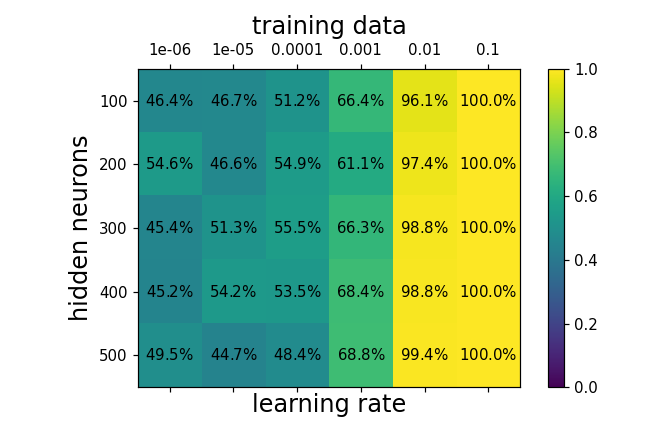

<IPython.core.display.Javascript object>


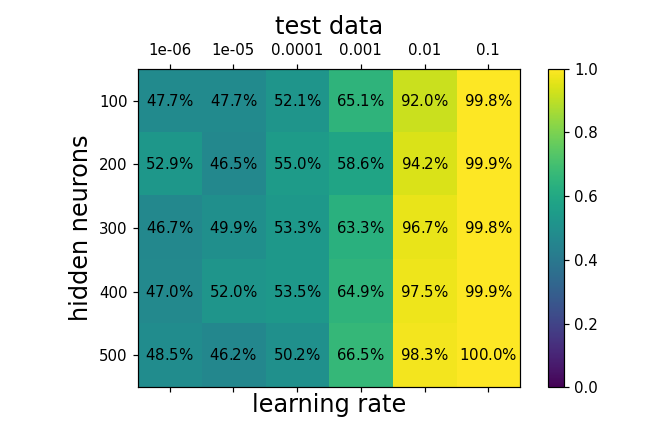

<IPython.core.display.Javascript object>


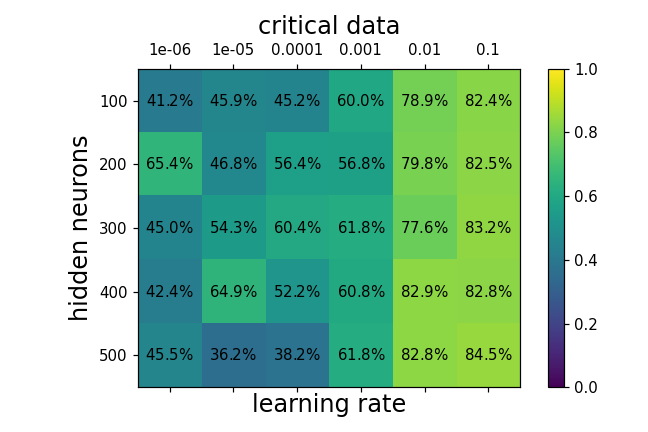

In [90]:
grid_search()

<span style="color:blue"> <i> 1. Do the grid search over 5 different types of activation functions (https://www.tensorflow.org/api_guides/python/nn#Activation_Functions). Evaluate the performance for each case and determine which gives the best accuracy. You can assume an arbitrary DNN. Show results for training, test, and critical data. </i></span> <br>

In [91]:
def create_DNN(activation=tf.nn.relu):
    with tf.name_scope('data'):
        X=tf.compat.v1.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.compat.v1.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.compat.v1.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.compat.v1.layers.dense(X, 500, activation = activation)
        hidden2 = tf.compat.v1.layers.dense(hidden1, 500, activation = activation)
        logits = tf.compat.v1.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.compat.v1.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

def evaluate_model(activation):
    
    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(activation=activation)
    with tf.compat.v1.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.compat.v1.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)
        
        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

def grid_search():
    """This function performs a grid search over a set of different activation functions."""

    # perform grid search over activation functions
    activation = [tf.nn.relu, tf.nn.elu, tf.nn.selu, tf.nn.leaky_relu, tf.nn.sigmoid]
    string_act = ['relu', 'elu', 'selu', 'leaky_relu', 'sigmoid']

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros(len(activation),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, activations in enumerate(activation):

        print("training DNN with %4s activation." %(string_act[i]) )

        train_loss[i],train_accuracy[i],\
        test_loss[i],test_accuracy[i],\
        critical_loss[i],critical_accuracy[i] = evaluate_model(activations)


    for i in range(len(string_act)):
        print("")
        print("Using the %4s activation, we achieve a training accuracy of: %0.6f." %(string_act[i], train_accuracy[i]))
        print("Using the %4s activation, we achieve a test accuracy of: %0.6f." %(string_act[i], test_accuracy[i]))
        print("Using the %4s activation, we achieve a critical accuracy of: %0.6f." %(string_act[i], critical_accuracy[i]))
        print("")

In [92]:
grid_search()

training DNN with relu activation.
train loss/accuracy: 0.004765252 1.0
test loss/accuracy: 0.012380649 0.9995192307692308
crtitical loss/accuracy: 0.35458508 0.8533333333333334
training DNN with  elu activation.
train loss/accuracy: 0.0061595375 1.0
test loss/accuracy: 0.035152167 0.9918269230769231
crtitical loss/accuracy: 0.3014849 0.8666666666666667
training DNN with selu activation.
train loss/accuracy: 0.007559219 1.0
test loss/accuracy: 0.122282065 0.958173076923077
crtitical loss/accuracy: 0.30039346 0.8791666666666667
training DNN with leaky_relu activation.
train loss/accuracy: 0.006455762 1.0
test loss/accuracy: 0.017597979 0.9995192307692308
crtitical loss/accuracy: 0.37680188 0.8266666666666667
training DNN with sigmoid activation.
train loss/accuracy: 0.71695924 0.5467948717948717
test loss/accuracy: 0.7371502 0.5259615384615385
crtitical loss/accuracy: 0.6366786 0.6666666666666666

Using the relu activation, we achieve a training accuracy of: 1.000000.
Using the relu act

<span style="color:blue"> <i> 2. Do the grid search over 5 different numbers of epochs and batch sizes. Make a 2D heat map as shown in the example. You can assume an arbitrary DNN. Show results for training, test, and critical data.  </i></span> <br>

In [94]:
def create_DNN():
    with tf.name_scope('data'):
        X=tf.compat.v1.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.compat.v1.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.compat.v1.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.compat.v1.layers.dense(X, 500, activation = tf.nn.elu)
        hidden2 = tf.compat.v1.layers.dense(hidden1, 500, activation = tf.nn.elu)
        logits = tf.compat.v1.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.compat.v1.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

def evaluate_model(training_epochs, batch_size):
    
    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN()
    with tf.compat.v1.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.compat.v1.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)
        
        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    training_epochs=[100, 200, 300, 400, 500]
    batch_size=[100, 200, 300, 400, 500]

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(training_epochs),len(batch_size)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, epochs in enumerate(training_epochs):
        for j, bs in enumerate(batch_size):

            print("training DNN over %4d epochs and mini_batches of size %0.6f." %(epochs,bs) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(epochs,bs)


    plot_data(batch_size,training_epochs, 'batch size', 'training epochs', train_accuracy, "training data")
    plot_data(batch_size,training_epochs, 'batch size', 'training epochs', test_accuracy, "test data")
    plot_data(batch_size,training_epochs, 'batch size', 'training epochs', critical_accuracy, "critical data")

training DNN over  100 epochs and mini_batches of size 100.000000.
train loss/accuracy: 0.0056753806 1.0
test loss/accuracy: 0.029997407 0.99375
crtitical loss/accuracy: 0.2742607 0.8775
training DNN over  100 epochs and mini_batches of size 200.000000.
train loss/accuracy: 0.006354902 1.0
test loss/accuracy: 0.03860161 0.9908653846153846
crtitical loss/accuracy: 0.29816905 0.8666666666666667
training DNN over  100 epochs and mini_batches of size 300.000000.
train loss/accuracy: 0.006439848 1.0
test loss/accuracy: 0.037225243 0.9908653846153846
crtitical loss/accuracy: 0.3148803 0.8716666666666667
training DNN over  100 epochs and mini_batches of size 400.000000.
train loss/accuracy: 0.006201299 1.0
test loss/accuracy: 0.04265712 0.9860576923076924
crtitical loss/accuracy: 0.29609436 0.8691666666666666
training DNN over  100 epochs and mini_batches of size 500.000000.
train loss/accuracy: 0.0058081383 1.0
test loss/accuracy: 0.04609163 0.9875
crtitical loss/accuracy: 0.28196472 0.87833

<IPython.core.display.Javascript object>


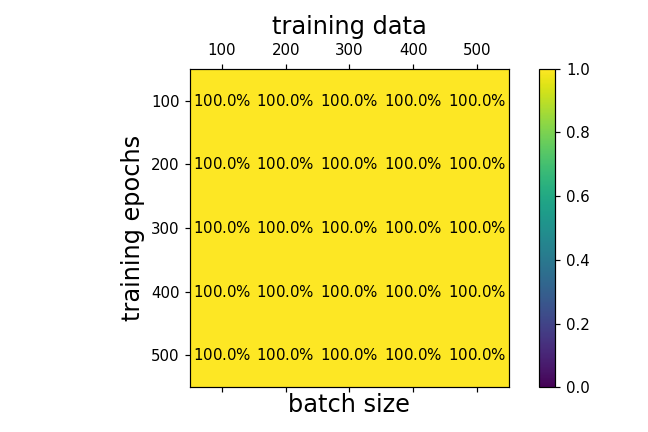

<IPython.core.display.Javascript object>


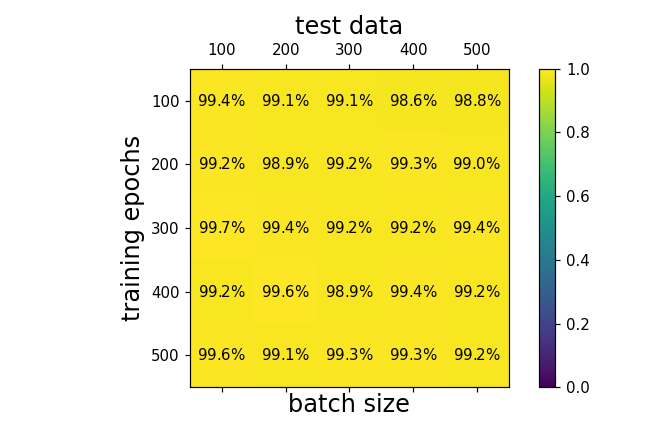

<IPython.core.display.Javascript object>


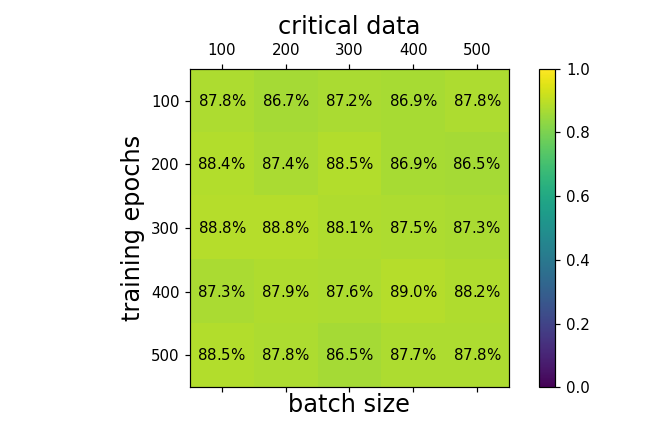

In [95]:
grid_search()

#### Problem 3 - SDSS galaxies


<span style="color:red"> <i> You should restart the kernel for Problem 3. </i></span> <br>


The data is provided in the file <b>"specz_data.txt"</b>. The columns of the file (length of 13) correspond to - <br>
spectroscopic redshift ('zspec'), RA, DEC, magnitudes in 5 bands - u, g, r, i, z (denoted as 'mu,' 'mg,' 'mr,' 'mi,' 'mz' respectively); Exponential and de Vaucouleurs model magnitude fits ('logExp' and 'logDev' http://www.sdss.org/dr12/algorithms/magnitudes/); zebra fit ('pz_zebra); Neural Network fit ('pz_NN') and its error estimate ('pz_NN_Err') <br>

We will undertake 2 exercises  - 
- Regression
    - We will use the magnitude of object in different bands ('mu, mg, mr, mi, mz') and do a regression exercise to estimate the redshift of the object. Hence our feature space is 5.
    - The correct redshift is given by 'zspec', which is the spectroscopic redshift of the object. We will use this for training and testing purpose. 
    
    Sidenote: Photometry vs. Spectroscopy
    
    <i>&nbsp; &nbsp; The amount of energy we receive from celestial objects – in the form of radiation – is called the flux, and an astro- nomical technique of measuring the flux is photometry. Flux is usually measured over broad wavelength bands, and with the estimate of the distance to an object, it can infer the object’s luminosity, temperature, size, etc. Usually light is passed through colored filters, and we measure the intensity of the filtered light. 
    
    &nbsp; &nbsp; On the other hand, spectroscopy deals with the spectrum of the emitted light. This tells us what the object is made of, how it is moving, the pressure of the material in it, etc. Note that for faint objects making photometric observation is much easier.
    
    &nbsp; &nbsp; Photometric redshift (photoz) is an estimate of the distance to the object using photometry. Spectroscopic redshift observes the object’s spectral lines and measures their shifts due to the Doppler effect to infer the distance.</i>
    

- Classification
    - We will use the same magnitudes and now also the redshift of the object  ('zspec') to classify the object as either Elleptical or Spiral. Hence our feature space is now 6.
    - The correct class is given by compring 'logExp' and 'logDev' which are the fits for Exponential and Devocular profiles. If logExp > logDev, its a spiral and vice-versa. We will use this for training and testing purpose. Since the classes are not explicitly given, generate a column for those (Classes can be $\pm 1$. If it is $0$, it does not belong to either of the class.)


##### Cleaning

Read in the files to create the data (X and Y) for both regression and classification. <br>
You will have to clean the data - 
- Drop the entries that are nan or infinite
- Drop the unrealistic numbers such as 999, -999; and magnitudes that are unrealistic. Since these are absolute magnitudes, they should be positive and high. Lets choose a magnitude limit of 15 as safe bet.
- For classification, drop the entries that do not belong to either of the class


In [2]:
#Read in and create data

fname = 'specz_data.txt'
spec_dat=np.genfromtxt(fname,names=True)
print(spec_dat.dtype.fields.keys())
#convenience variable
zspec = spec_dat['zspec']
pzNN = spec_dat['pz_NN']
#some N redshifts are not defined
pzNN[pzNN < 0] = np.nan

#For Regression
bands = ['u', 'g', 'r','i', 'z' ]
mlim = 15

xdata = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
bad = (xdata[:, 0] < mlim) | (xdata[:, 1] < mlim) | (xdata[:, 2] < mlim) & (xdata[:, 3] < mlim) | (xdata[:, 4] < mlim)
xdata = xdata[~bad]
xdata[xdata<0] = 0
ydata = zspec[~bad]

#For classification
classes = np.sign(spec_dat['logExp'] - spec_dat['logDev'])
tmp = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
xxdata = np.concatenate([tmp, zspec.reshape(-1, 1)], axis=1)
bad = (classes==0) | (xxdata[:, 0] < mlim) | (xxdata[:, 1] < mlim) | (xxdata[:, 2] < mlim) & (xxdata[:, 3] < mlim) | (xxdata[:, 4] < mlim)
xxdata = xxdata[~bad]
classes = classes[~bad]

dict_keys(['zspec', 'RA', 'DEC', 'mu', 'mg', 'mr', 'mi', 'mz', 'logExp', 'logDev', 'pz_zebra', 'pz_NN', 'pz_NN_Err'])


For regression, X and Y data (called "xdata" and "ydata," respectively) is cleaned magnitudes (5 feature space) and spectroscopic redshifts respectively.
For classification, X and Y data (called "xxdata" and "classes" respectively) is cleaned magnitudes+spectroscopic redshifts respectively (6 feature space) and classees respectively.

In [3]:
print('For Regression:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xdata.shape[0])
print('')
print('For Classification:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xxdata.shape[0])

For Regression:
Before: Size of datasets is  5338
After: Size of datasets is  4535

For Classification:
Before: Size of datasets is  5338
After: Size of datasets is  4147


##### Visualization

The next step should be to visualize the data. <br>
For regression
- Make a histogram for the distribution of the data (spectroscopic redshift). 
- Make 5 2D histograms of the distribution of the magnitude as function of redshift (Hint: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hist2d.html)

For classification <br>
- Make 6 1-d histogram for the distribution of the data (6 features - zspec and 5 magnitudes) for both class 1 and -1 separately 

<span style="color:blue"> <i> 1. Make histograms for both regression and classification. </i></span> <br>

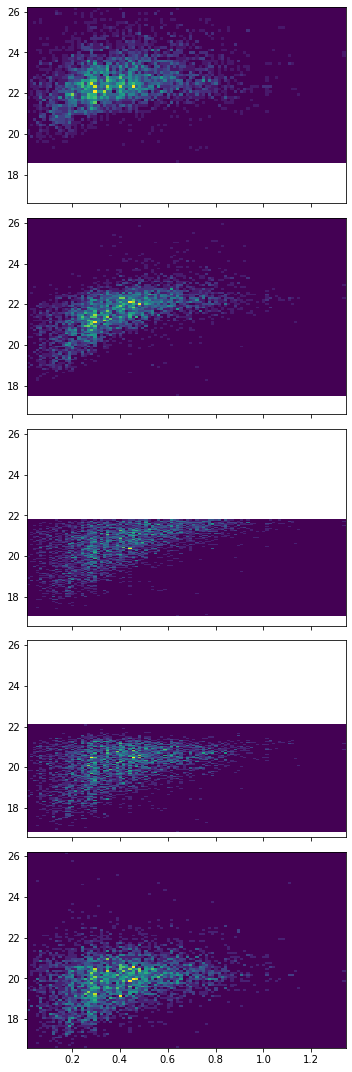

In [4]:
from matplotlib import colors

# regression plots
fig1, axs1 = plt.subplots(5, 1, figsize=(5, 15), sharex=True, sharey=True, tight_layout=True)
axs1[0].hist2d(ydata, xdata[:, 0], bins=100)
axs1[1].hist2d(ydata, xdata[:, 1], bins=100)
axs1[2].hist2d(ydata, xdata[:, 2], bins=100)
axs1[3].hist2d(ydata, xdata[:, 3], bins=100)
axs1[4].hist2d(ydata, xdata[:, 4], bins=100)

plt.show()

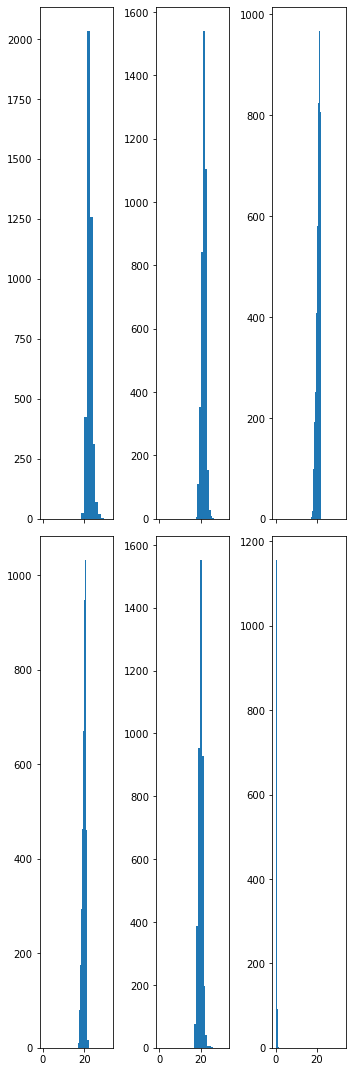

In [5]:
# classification
fig2, axs2 = plt.subplots(2, 3, figsize=(5, 15), sharex=True, sharey=False, tight_layout=True)
axs2[0, 0].hist(xxdata[:, 0], bins=10)
axs2[0, 1].hist(xxdata[:, 1], bins=10)
axs2[0, 2].hist(xxdata[:, 2], bins=10)
axs2[1, 0].hist(xxdata[:, 3], bins=10)
axs2[1, 1].hist(xxdata[:, 4], bins=10)
axs2[1, 2].hist(xxdata[:, 5], bins=10)

plt.show()

<span style="color:blue"> <i> 2. Do the following preprocessing: </i></span> <br>

#####  Preprocessing:

- Next, split the sample into training data and the testing data. We will be using the training data to train different algorithms and then compare the performance over the testing data. In this project, keep 80% data as training data and uses the remaining 20% data for testing.  <br>
- Often, the data can be ordered in a specific manner, hence shuffle the data prior to splitting it into training and testing samples. <br>
- Many algorithms are also not scale invariant, and hence scale the data (different features to a uniform scale). All this comes under preprocessing the data.
http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing <br>
Use StandardScaler from sklearn (or write your own routine) to center the data to 0 mean and 1 variance. Note that you only center the training data and then use its mean and variance to scale the testing data before using it. <br><br>

Hint: How to get a scaled training data: <br>

1. Let the training data be: train = ("training X data", "training Y data")<br>
2. You can first define a StandardScaler: <br>
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()<br>
3. Then, do the fit: <br>
for regression: scale_xdata.fit(train_regression[0]), scale_ydata.fit(train_regression[1].reshape(-1, 1))<br>
for classication: scale_xdata.fit(train_classification[0])<br>
  Here, no need to fit for y data for classification (it's either +1 or -1. Already scaled)<br>
4. Next, transform: <br>
 for regression: scaled_train_data = (scale_xdata.fit_transform(train_regression[0]), scale_ydata.fit_transform(train_regression[1].reshape(-1, 1)))<br>
 for classication: scaled_train_data = (scale_xdata.fit_transform(train_classification[0]), train_classification[1])<br>
 Again, y data is already scaled for classification.  <br>


Do this for test data as well.


In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
# Split the data into training and test sets
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(xdata, ydata, train_size=0.8)
xxdata_train, xxdata_test, classes_train, classes_test = train_test_split(xxdata, classes, train_size=0.8)

# Regression #

#training data
train_data_reg = [xdata_train, ydata_train]
scale_xdata_train = preprocessing.StandardScaler()
scale_ydata_train = preprocessing.StandardScaler()
scale_xdata_train.fit(train_data_reg[0])
scale_ydata_train.fit(train_data_reg[1].reshape(-1, 1))
scaled_train_data_reg = [scale_xdata_train.fit_transform(train_data_reg[0]), 
                         scale_ydata_train.fit_transform(train_data_reg[1].reshape(-1, 1))]

# test data
test_data_reg = [xdata_test, ydata_test]
scale_xdata_test = preprocessing.StandardScaler()
scale_ydata_test = preprocessing.StandardScaler()
scale_xdata_test.fit(test_data_reg[0])
scale_ydata_test.fit(test_data_reg[1].reshape(-1, 1))
scaled_test_data_reg = [scale_xdata_test.fit_transform(test_data_reg[0]), 
                        scale_ydata_test.fit_transform(test_data_reg[1].reshape(-1, 1))]

# Classification #

# training data
train_data_class = xxdata_train
scale_xxdata_train = preprocessing.StandardScaler()
scale_xxdata_train.fit(train_data_class)
scaled_train_data_class = [scale_xxdata_train.fit_transform(train_data_class), classes_train]

# test data
test_data_class = xxdata_test
scale_xxdata_test = preprocessing.StandardScaler()
scale_xxdata_test.fit(test_data_class)
scaled_test_data_class = [scale_xxdata_test.fit_transform(test_data_class), classes_test]


##### Metrics

The last remaining preperatory step is to write metric for gauging the performance of the algorithm. Write a function to calculate the 'RMS' error given (y_predict, y_truth) to gauge regression and another function to evaluate accuracy of classification. <br>
In addition, for classification, we will also use confusion matrix.

Below is an example you can use. Feel free to write you own.

In [8]:
from sklearn.metrics import confusion_matrix

def rms(x, y, scale1=None, scale2=None):
    '''Calculate the rms error given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    if scale1 is not None:
        x= scale1.inverse_transform(x)
    if scale2 is not None:
        y = scale2.inverse_transform(y)
    return  np.sqrt(np.mean((x[mask] - y[mask]) ** 2))

def acc(x, y):
    '''Calculate the accuracy given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    return  (x == y).sum()/x.size


#### Hyperparameter method

Now, we will be varying hyperparameters to get the best model and build some intuition. There are various ways to do this and we will use Grid Search methodology (as you did in Problem 1 and 2) which simply tries all the combinations along with some cross-validation scheme. For most part, we will use 4-fold cross validation. <br>
Sklearn provides GridSearchCV functionality for this purpose. <br>

Its recommended to spend some time to go through output format of GridSearchCV and write some utility functions to make the recurring plots for every parameter. <br>
Grid Search returns a dictionary with self explanatory keys for the most part. Mostly, the keys correspond to (masked) numpy arrays of size = #(all possible combination of parameters). The value of individual parameter in every combination is given in arrays with keys starting from 'param_\*' and this should help you to match the combination with the corresponding scores. <br>
For masked arrays, you can access the data values by using \*.data
<br>
<br>
*Do not overwrite these grid search-ed variables (and not only their result) since we will compare all the models together in the end*

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<span style="color:red"><i> You can choose to do only one of the two classifiers: kNN or Random Forests.</i></span> <br>
<span style="color:red"><i> If you choose to do Method 2 (Random Forests), take a look at hints from Method 1 (kNN). </i></span> <br>

### <span style="color:red"> Option (1) </span>
### Method 1. k Nearest Neighbors

For regression, let us play with grid search using knn to tune hyperparmeters. (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) Consider the following 3 hyperparameters - 
- Number of neighbors ([2, 3, 5, 10, 15, 20, 25, 50, 100])
- Weights of leaves (Uniform or Inverse Distance weighing)
- Distance metric (Eucledian or Manhattan distance - parameter 'p')

<span style="color:blue"> <i> 1. Do a grid search on these parameters. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value? </i></span> <br>

In [10]:
from sklearn.neighbors import KNeighborsRegressor

Hint: (Read the documentations carefully for more detail.)

First, define the hyperparameters: parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

Specify the algorithm you want to use: e.g. knnr = KNeighborsRegressor() 

Then, Do a grid search on these parameters using 4 fold cross validation: gcknn = GridSearchCV(knnr, parameters, cv=4)

Do the fit: gcknn.fit(*scaled_training_data) 

(Let "scaled_training_data" be the training data where "scaled_training_data = ("train X data", "train Y data")"

Get results: $results = gcknn.cv_results_$

$cv_results_$ has the following dictionaries: "rank_test_score," "mean_test_score," "std_test_score," and "params" (See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 

Then, you can evaluate the models based on "rank_test_score" and print out their "params," along with their "mean_test_score" and "std_test_score".

In [11]:
param_grid =  {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}
knnr = KNeighborsRegressor()
grid = GridSearchCV(estimator=knnr, param_grid=param_grid, cv=4)
grid_result = grid.fit(scaled_train_data_reg[0], scaled_train_data_reg[1])

In [12]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
ranks = grid_result.cv_results_['rank_test_score']
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for rank, mean, stdev, param in zip(ranks, means, stds, params):
    print("%f. %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.551359 using {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
34.000000. 0.397356 (0.032799) with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
33.000000. 0.403985 (0.028628) with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
36.000000. 0.378782 (0.024523) with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
35.000000. 0.386604 (0.029314) with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
31.000000. 0.447357 (0.028182) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
27.000000. 0.458183 (0.021311) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
32.000000. 0.437793 (0.028209) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
30.000000. 0.447476 (0.026781) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
23.000000. 0.497240 (0.013219) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
15.000000. 0.512564 (0.006541) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
24.000000. 0.494149 (0.015488) with: {'n_neighbors': 5, 'p': 2,

<span style="color:blue"> <i> 2. Also print out fitting and scoring times for all hyperparameter combinations. </i></span> <br>

*Plot timings for fitting and scoring*

Hint: Assume that you got results from: $results = gcknn.cv_results_$

Then, get the scoring time: results['mean_score_time']

and the fitting time: results['mean_fit_time']

In [13]:
scoring_times = grid_result.cv_results_['mean_score_time']
fitting_times = grid_result.cv_results_['mean_fit_time']

for score, fit, param in zip(scoring_times, fitting_times, params):
    print("Score time of %f, and fit time of %f with: %r" % (score, fit, param))

Score time of 0.005484, and fit time of 0.003242 with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Score time of 0.005987, and fit time of 0.000993 with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Score time of 0.004986, and fit time of 0.001248 with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Score time of 0.004737, and fit time of 0.001000 with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Score time of 0.005005, and fit time of 0.000993 with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Score time of 0.005478, and fit time of 0.001019 with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Score time of 0.005497, and fit time of 0.000996 with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Score time of 0.005489, and fit time of 0.000993 with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Score time of 0.005985, and fit time of 0.000994 with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Score time of 0.005980, and fit time of 0.001253 with: {'n_n

<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1 and 2, answer the following questions </i></span> <br>

- Is it always better to use more neighbors?
- Is it better to weigh the leaves, if yes, which distnace metric performs better?
- GridCV returns fitting and scoring time for every combination. You will find that scoring time is higher than training time. Why do you think is that the case?

##### Answer:
> It seems that the relationship between more neighbors and mean test score are not linear. After a certain number of neighbors, a max test score is achieved, but for neighbors beyond that value, it appears that the test score is either around the same or lower. Furthermore, it seems that the scoring time increases with number of neighbors whereas the fitting time decreases with neighbors. The distance metric seems to perform better at the scoring category whereas the scoring time slightly increases and the fitting time slightly decreases. It seems as though the distance metric performs better.

<span style="color:blue"> <i> 4. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. </i></span> <br>

Hint:
Suppose you have two types of hyperparameters: A and B.
Let A = [1, 2] and B = [1, 2, 4, 7, 10].

Then, you have 20 different combination of hyperparameters.

Let A = 1. Then, you can try (A,B) = (1,1), (1,2), (1,4), (1,7), (1,10)
Suppose that the mean score you got for the above combination is [0.7, 0.72, 0.75, 0.77, 0.8].
Similarly, for A = 2, you tried (A,B) = (2,1), (2,2), (2,4), (2,7), (2,10) and obtaind the mean score of [0.8, 0.82, 0.85, 0.87, 0.9].

To better see how changing the value of paramter A affects the performance, you can make the following plot:

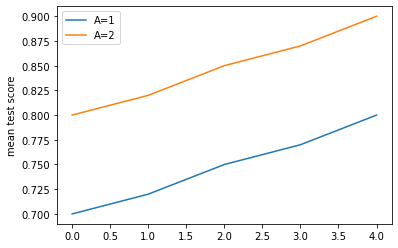

In [14]:
A_1 = [0.7, 0.72, 0.75, 0.77, 0.8]
A_2 = [0.8, 0.82, 0.85, 0.87, 0.9]

plt.plot(A_1, label = "A=1")
plt.plot(A_2, label = "A=2")
plt.ylabel("mean test score")
plt.legend()
plt.show()

This is the plot of the mean test score for A marginalizing over B.

Similarly, make a plot of the mean test score for each kNN hyperparameter.

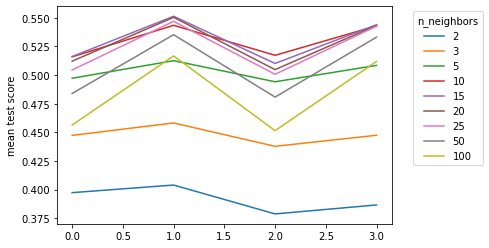

In [15]:
n_neighbors = [2, 3, 5, 10, 15, 20, 25, 50, 100]
mts_neighbors = []

for i in range(len(n_neighbors)):
    mts_neighbors.append(means[4*i:4*i+4])
    plt.plot(mts_neighbors[i], label=n_neighbors[i])
    
plt.ylabel("mean test score")
plt.legend(title='n_neighbors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

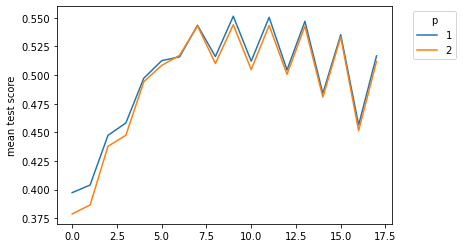

In [16]:
mts_p1 = []
mts_p2 = []

for i in range(len(params)):
    if params[i]['p'] == 1:
        mts_p1.append(means[i])
    else:
        mts_p2.append(means[i])

plt.plot(mts_p1, label=1)
plt.plot(mts_p2, label=2)
plt.ylabel("mean test score")
plt.legend(title='p', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

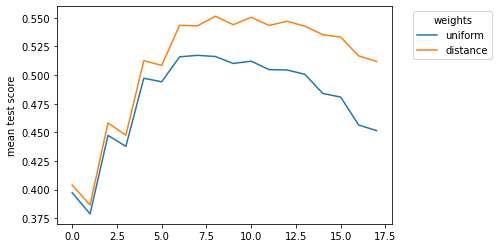

In [17]:
mts_uniform = []
mts_distance = []

for i in range(len(params)):
    if i%2==0:
        mts_uniform.append(means[i])
    else:
        mts_distance.append(means[i])

plt.plot(mts_uniform, label='uniform')
plt.plot(mts_distance, label='distance')
plt.ylabel("mean test score")
plt.legend(title='weights', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<span style="color:blue"> <i> 5. You have determined the best combination of hyperparameters and CV schemes. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

Hint: To determine the rms error, you need:

Truth: given from data (test_data[1]) <br>
Prediction: gridsearch.predict(test_data[0])
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [18]:
test_pred = grid.predict(scaled_test_data_reg[0])
err = rms(test_pred, scaled_test_data_reg[1])
print("We find that the rms error on the test data is: " + str(err))

We find that the rms error on the test data is: 0.674480059585985


#### Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here we will look at 4 different type of cross-validation schemes - 
- Kfold
- Stratified Kfold
- Shuffle Split
- Stratified Shuffle Split

<span style="color:blue"> <i> 6. Assuming the list of hyperparameters from Part 1, do 4 different grid searches. From Part 1, take top 5 combination of hyperparameters which gives you the highest accuracy value. Rank the performance of CV schemes for each combination.  </i></span> <br>

In [20]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [21]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}
knnc = KNeighborsClassifier()

#Grid Search
gc = GridSearchCV(knnc, parameters, cv=KFold(4, random_state=100))
gc_result = gc.fit(scaled_train_data_class[0], scaled_train_data_class[1])

gc2 = GridSearchCV(knnc, parameters, cv=StratifiedKFold(4, random_state = 100))
gc2_result = gc2.fit(scaled_train_data_class[0], scaled_train_data_class[1])

gc3 = GridSearchCV(knnc, parameters, cv=ShuffleSplit(4, 0.1, random_state = 100))
gc3_result = gc3.fit(scaled_train_data_class[0], scaled_train_data_class[1])

gc4 = GridSearchCV(knnc, parameters, cv=StratifiedShuffleSplit(4, 0.1, random_state = 100))
gc4_result = gc4.fit(scaled_train_data_class[0], scaled_train_data_class[1])

In [22]:
# summarize results
print("Best: %f using %s" % (gc_result.best_score_, gc_result.best_params_))
means = gc_result.cv_results_['mean_test_score']
stds = gc_result.cv_results_['std_test_score']
params = gc_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752487 using {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.710280 (0.013393) with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.664757 (0.006269) with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.707266 (0.010321) with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.665059 (0.010387) with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.699427 (0.015712) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.704854 (0.012170) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.696111 (0.011463) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.700935 (0.007251) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.721737 (0.011398) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.723545 (0.011371) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.719626 (0.004724) with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.724450 (0.005657) with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.735604 (0.012200) wi

In [23]:
# summarize results
print("Best: %f using %s" % (gc2_result.best_score_, gc2_result.best_params_))
means = gc2_result.cv_results_['mean_test_score']
stds = gc2_result.cv_results_['std_test_score']
params = gc2_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752186 using {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.710280 (0.009779) with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.664757 (0.008078) with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.707567 (0.009076) with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.663853 (0.010222) with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.698824 (0.010815) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.704251 (0.007908) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.694302 (0.009609) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.698523 (0.006376) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.719928 (0.006871) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.722038 (0.006935) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.717817 (0.004729) with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.721737 (0.003447) with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.735303 (0.005833) wi

In [24]:
# summarize results
print("Best: %f using %s" % (gc3_result.best_score_, gc3_result.best_params_))
means = gc3_result.cv_results_['mean_test_score']
stds = gc3_result.cv_results_['std_test_score']
params = gc3_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.745482 using {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
0.694277 (0.020704) with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.659639 (0.011270) with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.690512 (0.018613) with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.649849 (0.014188) with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.679970 (0.016133) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.689759 (0.012235) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.686747 (0.015505) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.700301 (0.015432) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.695783 (0.012955) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.710090 (0.012668) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.709337 (0.024884) with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.716867 (0.022031) with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.728163 (0.016133) wi

In [25]:
# summarize results
print("Best: %f using %s" % (gc4_result.best_score_, gc4_result.best_params_))
means = gc4_result.cv_results_['mean_test_score']
stds = gc4_result.cv_results_['std_test_score']
params = gc4_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753012 using {'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
0.724398 (0.013215) with: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.669428 (0.007492) with: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.716867 (0.019404) with: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.661898 (0.005784) with: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.695030 (0.014347) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.705572 (0.011738) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.694277 (0.017237) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.707078 (0.017089) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.713855 (0.023038) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.725904 (0.023717) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.716867 (0.018568) with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.724398 (0.020595) with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.737199 (0.014504) wi

<span style="color:blue"> <i> 7. Answer the following questions: </i></span> <br>

- Are the conclusions different for any parameter from the regression case?
- Does the mean accuracy change for different CV scheme?
- Does the standard deviation in mean accuracy change?

##### Answer:
> For the classification case, we get different results from the regression case for the Stratified Shuffle Split, KFold, and Stratified KFold cross validation technique. In each of those cases, we achieve the best result with 25 neighbors, p = 1, and the distance metric. The Shuffle Split cross validation achieves the best result with 15 neighbors, p = 1, and the distance metric. All of these techniques share similarities with the regression case only with the metric, all of which using distance. They all differ in that regression uses a p value of 2 whereas the others use p = 1. Finally only the Shuffle Split shares a similarity with the regression task for the number of neighbors. Generally the mean accuracy does not change significantly with CV scheme. The standard deviation in mean accuracy for the KFold and Stratified KFold schemes is half of that for the Shuffle Split and Stratified Shuffle Split.

<span style="color:blue"> <i> 8. Using the best combination of hyperparameters and CV schemes you have found, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

Hint: To get a confusion matrix, you need both truth (available from data) and prediction (can be computed using .predict function from GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [26]:
from sklearn.metrics import confusion_matrix

test_pred = gc4.predict(scaled_test_data_class[0])
confusion = confusion_matrix(scaled_test_data_class[1], test_pred)
accuracy = acc(scaled_test_data_class[1], test_pred)
print("The accuracy of the KNeighborsClassifier is: " + str(accuracy) + ", with confusion matrix: " + str(confusion))

The accuracy of the KNeighborsClassifier is: 0.7397590361445783, with confusion matrix: [[504  37]
 [179 110]]


### <span style="color:red"> Option (2) </span>
### Method 2. Random Forests

The most important feature of the random forest is the number of trees in the ensemble. We will also play with the maximum depth of the trees.

Try:<br>
n_estimators = [10, 50, 150, 200, 300]<br>
max_depth = [10, 50, 100]<br>

In [27]:
from sklearn.ensemble import RandomForestRegressor
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<span style="color:blue"> <i> 1. Do the grid search over n_estimators and max_depth. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>


In [28]:
rf = RandomForestRegressor()
param_grid = {'n_estimators':[10, 50, 150, 200, 300], 'max_depth':[10, 50, 100]}
gcrf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
gcrf_result = gcrf.fit(scaled_train_data_reg[0], scaled_train_data_reg[1])

# summarize results
print("Best: %f using %s" % (gcrf_result.best_score_, gcrf_result.best_params_))
means = gcrf_result.cv_results_['mean_test_score']
stds = gcrf_result.cv_results_['std_test_score']
params = gcrf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.587302 using {'max_depth': 50, 'n_estimators': 300}
0.559128 (0.015873) with: {'max_depth': 10, 'n_estimators': 10}
0.578992 (0.016041) with: {'max_depth': 10, 'n_estimators': 50}
0.584509 (0.014565) with: {'max_depth': 10, 'n_estimators': 150}
0.586738 (0.013250) with: {'max_depth': 10, 'n_estimators': 200}
0.585527 (0.011980) with: {'max_depth': 10, 'n_estimators': 300}
0.549441 (0.010416) with: {'max_depth': 50, 'n_estimators': 10}
0.580710 (0.017328) with: {'max_depth': 50, 'n_estimators': 50}
0.585528 (0.012607) with: {'max_depth': 50, 'n_estimators': 150}
0.585090 (0.011954) with: {'max_depth': 50, 'n_estimators': 200}
0.587302 (0.014083) with: {'max_depth': 50, 'n_estimators': 300}
0.539997 (0.009818) with: {'max_depth': 100, 'n_estimators': 10}
0.581982 (0.010544) with: {'max_depth': 100, 'n_estimators': 50}
0.585066 (0.014853) with: {'max_depth': 100, 'n_estimators': 150}
0.584464 (0.013717) with: {'max_depth': 100, 'n_estimators': 200}
0.586991 (0.013140) with: {'max_

<span style="color:blue"> <i> 2. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. (plot the mean test score of n_estimators marginalizing over max_depth, etc) </i></span> <br>

<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1, answer the following questions: </i></span> <br>

- Are the scores of these models statistically different? Based on this, which architecture will you choose for your model?
- For every parameter, make the plot for fitting time. Based on this and the previous question, how many trees do you recommend keeping in the ensemble?

In [ ]:
...

##### Answer:


<span style="color:blue"> <i> 4. You have determined the best combination of hyperparameters. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

In [ ]:
...

#### Classification



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
#Grid search (This will take few minutes)

rfc = RandomForestClassifier()
parameters = ...

gcrfc = GridSearchCV(rfc, parameters, cv=StratifiedShuffleSplit(4, 0.1, random_state = 100))

...

<span style="color:blue"> <i> 5. Assuming the list of hyperparameters from Part 1, do the grid search using StratifiedShuffleSplit CV scheme. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>

In [ ]:
...

<span style="color:blue"> <i> 6. Using the best combination of hyperparameters, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

In [ ]:
...

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()